In [3]:
from apportionment import *

In [ ]:
db_file = 'coalitions.db'

if not os.path.exists(db_file):
    years = ["1994", "1998", "2002", "2006", "2010", "2012", "2016", "2020", "2023"]

    conn = sqlite3.connect(db_file)
    cur = conn.cursor()
            
    for year in years:
        cur.execute(f'''CREATE TABLE IF NOT EXISTS tab{year} (
                    iteration_number INTEGER,
                    party_number INTEGER,
                    samples INTEGER,
                    diff INTEGER
                    );''')

        with open(f'./raw_data/1m-{year}coal.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header if exists
            for i, row in enumerate(reader):
                cur.execute(f'''INSERT INTO tab{year} (iteration_number, party_number, samples, diff)
                                VALUES (?, ?, ?, ?);''', row)
            
    conn.commit()
    conn.close()


In [5]:
raw2visualisable(f"1m-2023coal.csv", weighted=False)
raw2visualisable(f"1m-2023coal.csv", weighted=False, only_electable=True)


1m-2023coal.csv done
1m-2023coal.csv done


In [ ]:
# zacnime pohladom, ktory to riesi cez prvu zmenu, vycuckany z databazky. ideme pozerat priemer vsetkych stran teraz

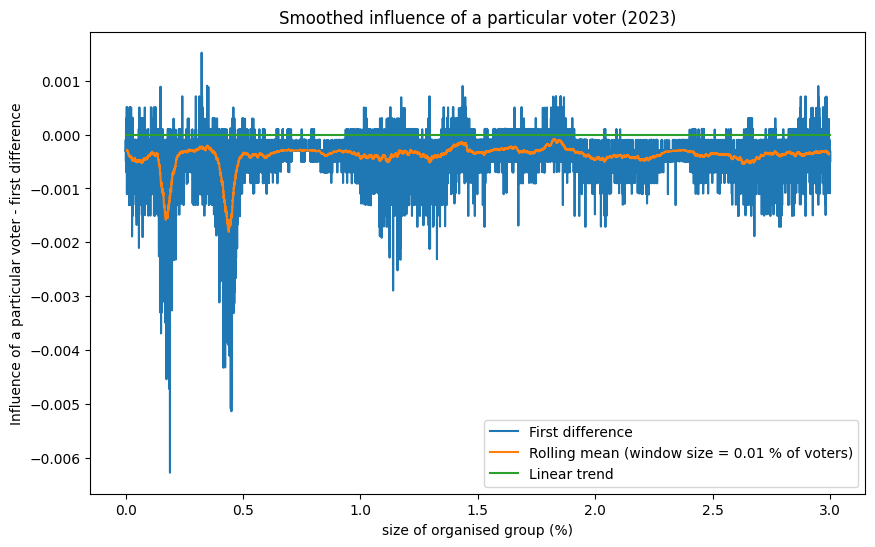

In [17]:
# Toto je alternativny pohlad na to, cez diferenciu

df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023coal.csv")

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

plt.show()